<a href="https://colab.research.google.com/github/Katleho10/Mall-Customer-Segmentation/blob/main/Mall_Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents
1. Introduction
2. Defining the problem statement
3. Imports
4. EDA
5. K-Means Clustering summary
6. Model Interpretation 
7. Benefits of customer segmentation

### 1. Introduction

Market segmentation is the activity of dividing a broad consumer or business market, normally consisting of existing and potential customers, into sub-groups of consumers based on some type of shared characteristics.

Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.


Malls or shopping complexes are often involved in the race to increase their customers and hence making huge profits. To achieve this task machine learning can be applied. The shopping complexes make use of their customers data and develop ML models to target the right ones.


### 2. Defining the problem statement

You own the mall and want to understand the customers l who can easily be a target market so that the it can be given to marketing team and plan the strategy accordingly

We have four features in our datasets -

Customer Id
Gender
Age
Annual Income
Spending Score

Based on the above data we have to find a group of customer, which are unique in their own way. So that proper marketing strategy can be defined for each group and targeted separately.

### 3. Imports

In [ ]:
import numpy as np
pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
#check missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 4. EDA

In [ ]:
# Check to see descriptive statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


From the above  table, we can see that there are no values to clean. Age looks normally distributed, annual income in the thousands doesn't have outliers that are too excessive. Spending score is between 1 and 100. 

In [ ]:
df.Gender.value_counts()

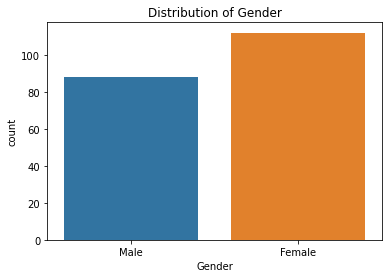

In [ ]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='Gender', data=df);
plt.title('Distribution of Gender');

* There are more women than men in this dataset

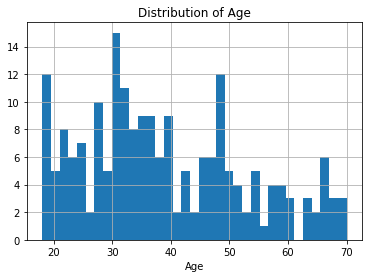

In [ ]:
# Histogram of ages
df.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

* Age histogram is approximately right-tailed. We saw that the average age was 38 as well, so this is not surprising, with a spike in ages 48-49 and 65 as well

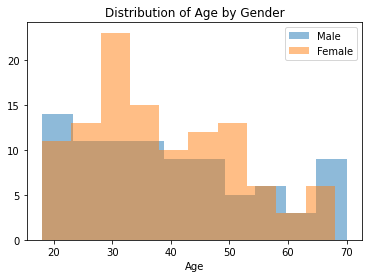

In [ ]:
# Histogram of ages by gender
plt.hist('Age', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

We can see two things here, one reflected earlier in the describe call

1. There are more women than men in this data set.
2. There are a lot of younger women and middle-aged women.

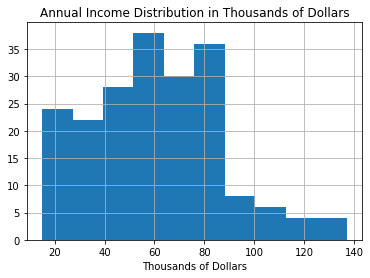

In [ ]:

# Histogram of income
df.hist('Annual Income (k$)');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

* The most frequent annual incomes are between around 50 000 and 85,000

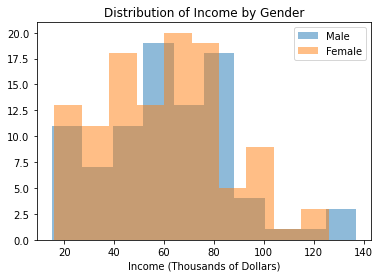

In [ ]:

# Histogram of income by gender
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

* Women generally had lower income than men, the majority falling between 45 and 80,000

In [ ]:
# Create data sets by gender
male_customers = df[df['Gender'] == 'Male']
female_customers = df[df['Gender'] == 'Female']

In [ ]:
# Print the average spending score for men and women
print(male_customers['Spending Score (1-100)'].mean())
print(female_customers['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


* Women on average had a higher spending score by about 3 points

C:\Users\Katleho Ramonotsi\Anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


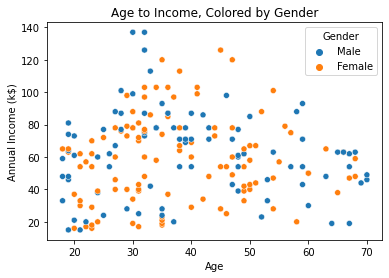

In [ ]:

sns.scatterplot('Age', 'Annual Income (k$)', hue='Gender', data=df);
plt.title('Age to Income, Colored by Gender');

* There is pretty much no correlation between age and income for either men or women in this data. 

C:\Users\Katleho Ramonotsi\Anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


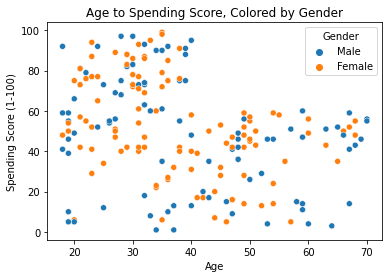

In [ ]:
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Gender', data=df);
plt.title('Age to Spending Score, Colored by Gender');

* The above plot shows the negative correlation between age and spending score.

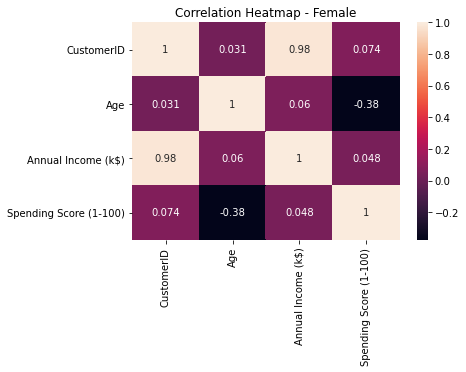

In [ ]:
sns.heatmap(female_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Female');

* Comparing men to women reveals that there is a slightly higher correlation between age and spending score for women

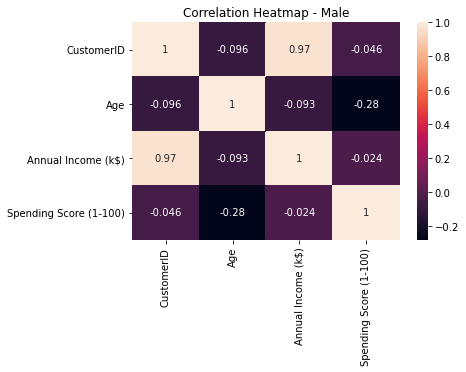

In [ ]:
sns.heatmap(male_customers.corr(), annot=True);
plt.title('Correlation Heatmap - Male');

C:\Users\Katleho Ramonotsi\Anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


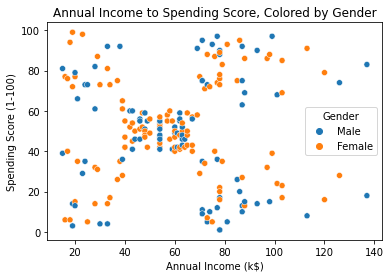

In [ ]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=df);
plt.title('Annual Income to Spending Score, Colored by Gender');

* Annual Income and Spending Score have somewhat related means and standard deviations, which is why we see this strange shape. But there is very low if no correlation here

### 5. K-Means Clustering summary

* K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. 
* The Centroid is a point that represent each cluster.
* To implement K-Means clustering, we need to look at the Elbow Method.
* The Elbow method is a method of interpretation and validation of consistency within-cluster analysis designed to help to find the appropriate number of clusters in a dataset. 

In [ ]:
### Feature selection for the model
#Considering only 2 features (Annual income and Spending Score)
X= df.iloc[:, [3,4]].values

In [ ]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters
    #WCSS is - it is total within cluster sum of squares

C:\Users\Katleho Ramonotsi\Anaconda3.1\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


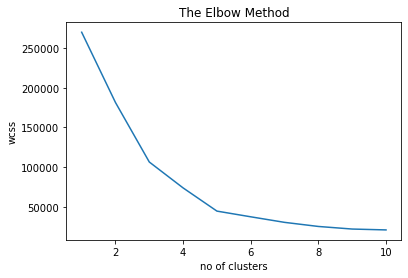

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#Last elbow comes at k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmentation.

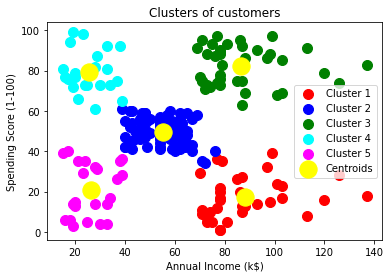

In [ ]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### How the K-means algorithm works

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids


### 6. Model Interpretation 

* Cluster 1 (Red Colour) -> earning high but spending less. These are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities should try to add new facilities so that they can attract these people and can meet their needs.
* Cluster 2 (Blue Colour) -> average in terms of earning and spending. These people will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.
* Cluster 3 (Green Color) -> earning high and also spending high. These people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.
* Cluster 4 (cyan Color) -> earning less but spending more. These are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.
* Cluster 5 (magenta Color) -> Earning less , spending less. These is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.


###### We can put Cluster 1 into some alerting system where email can be send to them on daily basis as they are the target market.  Others we can set like once in a week or once in a month ######


### 7. Benefits of customer segmentation

* It enables companies to target specific groups of customers 
* When a group of customers is sent personalized messages as part of a marketing mix that is designed around their needs. It's easier for companies to send those customers special offers meant to encourage them to buy more products. Futhermore,Customer segmentation tend to be more valued and appreciated by the customer who receives them as opposed to impersonal brand messaging that doesn't acknowledge purchase history or any kind of customer relationship.
* Customer segmentation can also improve customer service and assist in customer loyalty and retention.
* Staying a step ahead of competitors in specific sections of the market and identifying new products that existing or potential customers could be interested in or improving products. to meet customer expectations
